In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Encoder model (MLP)
class Encoder(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=128, output_dim=64):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No activation function here, outputs raw embeddings
        return x

# Contrastive loss (NT-Xent loss)
def nt_xent_loss(z_i, z_j, temperature=0.5):
    # Normalize embeddings
    z_i = F.normalize(z_i, dim=1)
    z_j = F.normalize(z_j, dim=1)

    # Cosine similarity between all embeddings
    logits = torch.matmul(z_i, z_j.T) / temperature
    labels = torch.arange(logits.size(0)).long().to(z_i.device)

    # Loss calculation (CrossEntropy between positive pairs and negatives)
    loss = F.cross_entropy(logits, labels)
    return loss

# Data augmentation function (applies random noise)
def data_augmentation(x):
    noise = torch.randn_like(x) * 0.2  # Add random noise as augmentation
    return x + noise

# SimCLR-style contrastive learning framework
class SimCLR(nn.Module):
    def __init__(self, encoder, projection_dim=64):
        super(SimCLR, self).__init__()
        self.encoder = encoder
        self.projector = nn.Linear(projection_dim, projection_dim)

    def forward(self, x_i, x_j):
        z_i = self.encoder(x_i)
        z_j = self.encoder(x_j)
        
        # Project the embeddings
        z_i = self.projector(z_i)
        z_j = self.projector(z_j)

        return z_i, z_j

# Example of usage
if __name__ == "__main__":
    # Hyperparameters
    input_dim = 64
    batch_size = 100
    epochs = 1000

    # Create encoder model
    encoder = Encoder(input_dim=input_dim)
    model = SimCLR(encoder)

    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # Dummy data (replace with real 64-d behavior vectors)
    behavior_data = torch.randn(batch_size, input_dim)

    # Training loop
    for epoch in range(epochs):
        # Data augmentation (generate two views)
        x_i = data_augmentation(behavior_data)
        x_j = data_augmentation(behavior_data)

        # Forward pass
        z_i, z_j = model(x_i, x_j)

        # Compute contrastive loss
        loss = nt_xent_loss(z_i, z_j)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/1000], Loss: 3.8182
Epoch [2/1000], Loss: 3.5976
Epoch [3/1000], Loss: 3.3843
Epoch [4/1000], Loss: 3.2093
Epoch [5/1000], Loss: 3.0910
Epoch [6/1000], Loss: 3.0146
Epoch [7/1000], Loss: 2.9601
Epoch [8/1000], Loss: 2.9385
Epoch [9/1000], Loss: 2.9149
Epoch [10/1000], Loss: 2.8947
Epoch [11/1000], Loss: 2.8785
Epoch [12/1000], Loss: 2.8716
Epoch [13/1000], Loss: 2.8635
Epoch [14/1000], Loss: 2.8504
Epoch [15/1000], Loss: 2.8385
Epoch [16/1000], Loss: 2.8347
Epoch [17/1000], Loss: 2.8245
Epoch [18/1000], Loss: 2.8211
Epoch [19/1000], Loss: 2.8132
Epoch [20/1000], Loss: 2.8112
Epoch [21/1000], Loss: 2.8154
Epoch [22/1000], Loss: 2.8109
Epoch [23/1000], Loss: 2.8101
Epoch [24/1000], Loss: 2.8025
Epoch [25/1000], Loss: 2.8013
Epoch [26/1000], Loss: 2.7990
Epoch [27/1000], Loss: 2.7946
Epoch [28/1000], Loss: 2.7927
Epoch [29/1000], Loss: 2.7898
Epoch [30/1000], Loss: 2.7880
Epoch [31/1000], Loss: 2.7855
Epoch [32/1000], Loss: 2.7846
Epoch [33/1000], Loss: 2.7799
Epoch [34/1000], Lo

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Encoder model (MLP)
class Encoder(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=128, output_dim=64):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Contrastive loss (NT-Xent loss)
def nt_xent_loss(z_i, z_j, temperature=0.5):
    z_i = F.normalize(z_i, dim=1)
    z_j = F.normalize(z_j, dim=1)
    logits = torch.matmul(z_i, z_j.T) / temperature
    labels = torch.arange(logits.size(0)).long().to(z_i.device)
    loss = F.cross_entropy(logits, labels)
    return loss

# Data augmentation with Gaussian noise
def data_augmentation(x):
    noise = torch.randn_like(x) * 0.05  # Adjusted noise strength
    return x + noise

# SimCLR model with deeper projection head
class SimCLR(nn.Module):
    def __init__(self, encoder, projection_dim=64):
        super(SimCLR, self).__init__()
        self.encoder = encoder
        self.projector = nn.Sequential(
            nn.Linear(projection_dim, 128),
            nn.ReLU(),
            nn.Linear(128, projection_dim)
        )

    def forward(self, x_i, x_j):
        z_i = self.encoder(x_i)
        z_j = self.encoder(x_j)
        z_i = F.normalize(self.projector(z_i), dim=1)
        z_j = F.normalize(self.projector(z_j), dim=1)
        return z_i, z_j

# Training
if __name__ == "__main__":
    input_dim = 64
    batch_size = 128
    epochs = 100

    encoder = Encoder(input_dim=input_dim)
    model = SimCLR(encoder)

    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    behavior_data = torch.randn(batch_size, input_dim)

    for epoch in range(epochs):
        x_i = data_augmentation(behavior_data)
        x_j = data_augmentation(behavior_data)

        z_i, z_j = model(x_i, x_j)
        loss = nt_xent_loss(z_i, z_j)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/100], Loss: 4.3824
Epoch [2/100], Loss: 4.1407
Epoch [3/100], Loss: 3.8581
Epoch [4/100], Loss: 3.5796
Epoch [5/100], Loss: 3.3536
Epoch [6/100], Loss: 3.1990
Epoch [7/100], Loss: 3.1149
Epoch [8/100], Loss: 3.0786
Epoch [9/100], Loss: 3.0681
Epoch [10/100], Loss: 3.0690
Epoch [11/100], Loss: 3.0746
Epoch [12/100], Loss: 3.0783
Epoch [13/100], Loss: 3.0776
Epoch [14/100], Loss: 3.0714
Epoch [15/100], Loss: 3.0591
Epoch [16/100], Loss: 3.0447
Epoch [17/100], Loss: 3.0298
Epoch [18/100], Loss: 3.0162
Epoch [19/100], Loss: 3.0051
Epoch [20/100], Loss: 2.9964
Epoch [21/100], Loss: 2.9914
Epoch [22/100], Loss: 2.9875
Epoch [23/100], Loss: 2.9864
Epoch [24/100], Loss: 2.9858
Epoch [25/100], Loss: 2.9858
Epoch [26/100], Loss: 2.9848
Epoch [27/100], Loss: 2.9838
Epoch [28/100], Loss: 2.9825
Epoch [29/100], Loss: 2.9801
Epoch [30/100], Loss: 2.9774
Epoch [31/100], Loss: 2.9745
Epoch [32/100], Loss: 2.9706
Epoch [33/100], Loss: 2.9674
Epoch [34/100], Loss: 2.9655
Epoch [35/100], Loss: 2

Epoch [50/1000], Loss: 4.1537
Epoch [100/1000], Loss: 4.0629
Epoch [150/1000], Loss: 4.4062
Epoch [200/1000], Loss: 3.9794
Epoch [250/1000], Loss: 3.9755
Epoch [300/1000], Loss: 3.9307
Epoch [350/1000], Loss: 3.9517
Epoch [400/1000], Loss: 3.9296
Epoch [450/1000], Loss: 3.9366
Epoch [500/1000], Loss: 3.9632
Epoch [550/1000], Loss: 3.9389
Epoch [600/1000], Loss: 3.9444
Epoch [650/1000], Loss: 3.9125
Epoch [700/1000], Loss: 3.9365
Epoch [750/1000], Loss: 3.9273
Epoch [800/1000], Loss: 3.8929
Epoch [850/1000], Loss: 3.9312
Epoch [900/1000], Loss: 3.9251
Epoch [950/1000], Loss: 3.9243
Epoch [1000/1000], Loss: 3.9092


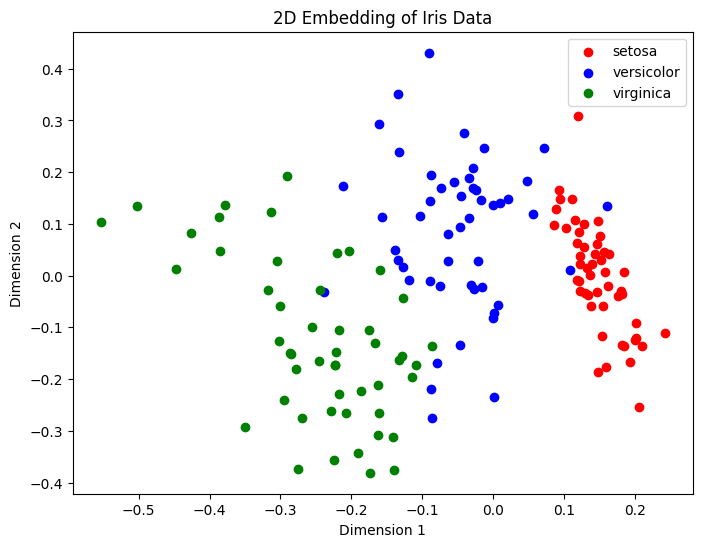

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# 1. Irisデータのロード
iris = datasets.load_iris()
data = iris.data  # (150, 4) features
target = iris.target  # (150,) labels

# PyTorchのテンソルに変換
data = torch.tensor(data, dtype=torch.float32)
target = torch.tensor(target, dtype=torch.long)

# 2. シンプルなエンコーダモデル（2次元出力）
class Encoder(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=32, output_dim=2):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # 2次元の出力
        return x

# 3. Contrastive loss（対照学習をシミュレート）
def nt_xent_loss(z_i, z_j, temperature=0.5):
    z_i = F.normalize(z_i, dim=1)
    z_j = F.normalize(z_j, dim=1)
    logits = torch.matmul(z_i, z_j.T) / temperature
    labels = torch.arange(logits.size(0)).long().to(z_i.device)
    loss = F.cross_entropy(logits, labels)
    return loss

# 4. 学習と可視化
def train_and_visualize(data, target):
    # モデルと最適化
    encoder = Encoder(input_dim=4, hidden_dim=32, output_dim=2)
    optimizer = optim.Adam(encoder.parameters(), lr=1e-3)
    
    # データ拡張 (例としてランダムノイズを加える)
    def data_augmentation(x):
        noise = torch.randn_like(x) * 0.05
        return x + noise
    
    epochs = 1000
    for epoch in range(epochs):
        # 2つのビューを生成 (データ拡張)
        x_i = data_augmentation(data)
        x_j = data_augmentation(data)

        # 埋め込みを取得
        z_i = encoder(x_i)
        z_j = encoder(x_j)

        # 対照損失を計算
        loss = nt_xent_loss(z_i, z_j)

        # 逆伝播と最適化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # 最終的な2次元埋め込みを取得
    with torch.no_grad():
        embeddings = encoder(data).numpy()

    # 5. クラスごとに色分けされた2次元プロットを生成
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green']
    for i in range(3):
        indices = np.where(target.numpy() == i)
        plt.scatter(embeddings[indices, 0], embeddings[indices, 1], label=iris.target_names[i], color=colors[i])

    plt.title("2D Embedding of Iris Data")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.show()

# 実行
train_and_visualize(data, target)
